In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
# add quality_label column
for wine_type in [red_wine, white_wine]:
    # we are creating a new column called "quality_label", we define a range and associate that range with a label
    wine_type['quality_label'] = wine_type['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
    wine_type['quality_label'] = pd.Categorical(wine_type['quality_label'],
    categories=['low', 'medium', 'high'])

In [12]:
# create a df with all wines for exercises later

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine])

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

# Epic 1: Univariate Analysis
This is perhaps one of the easiest yet a core foundational step in exploratory data analysis. Univariate analysis involves analyzing data such that at any instance of analysis you are only dealing with one variable or feature. No relationships or correlations are analyzed among multiple variables. The simplest way to easily visualize all the variables in your data is to build some histograms.

The following snippet helps visualize distributions of data values for all features. While histogram may not be an appropriate visualization in many cases, it is a good one to start with for numeric data.

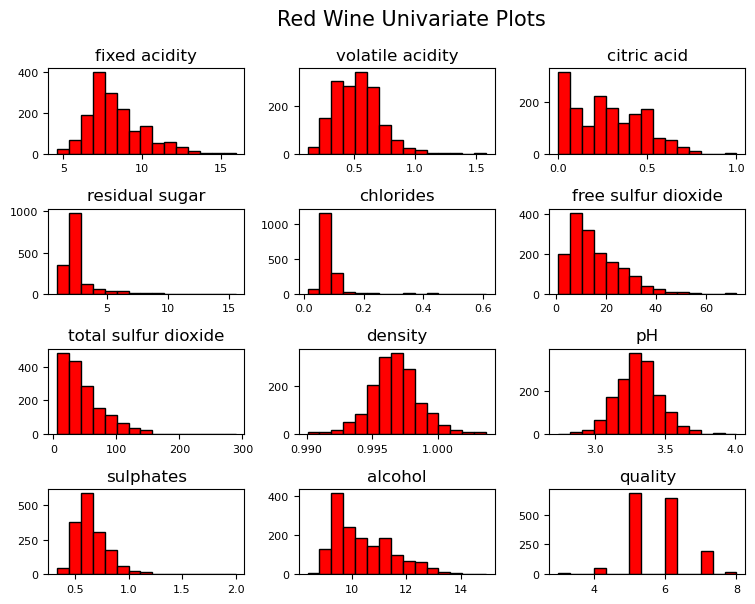

In [5]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

It is important to note that we are using the [pandas hist() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). This function calls the matplotlib hist() method, on each series in the DataFrame, resulting in one histogram per column.

Since we just want to look at the distribution, we don't really care now if the Y-Axis has different value for each histogram.

Try to do the same for white wine.

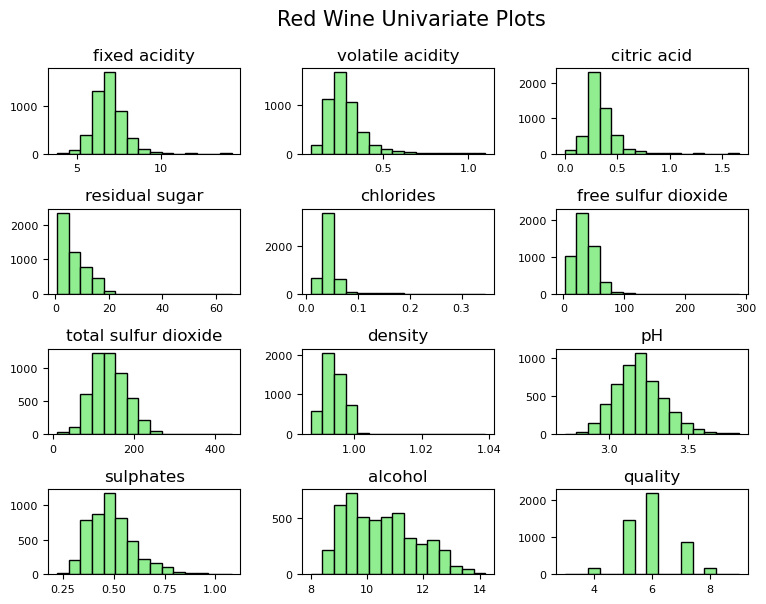

In [7]:
white_wine.hist(bins=15, color='lightgreen', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

Read this article too: https://www.kaggle.com/residentmario/univariate-plotting-with-pandas

The power of packages like matplotlib and pandas enable you to easily plot variable distributions. Do you notice any interesting patterns across the two wine types?

You can choose single features and analyze them.

For example, take the feature named residual sugar and plot the distributions across data pertaining to red and white wine samples.

Try to reproduce the same [histograms](https://seaborn.pydata.org/generated/seaborn.histplot.html): include the title, the labels, and make sure this time the Y-Axis have the same limit. Also, notice how the values on the x-axis have been binned.

Hint: title, labels and Y-Axis limit are all features of the [axes class](https://matplotlib.org/stable/api/axes_api.html)!

Do the same with other features to see if there are more interesting observations.

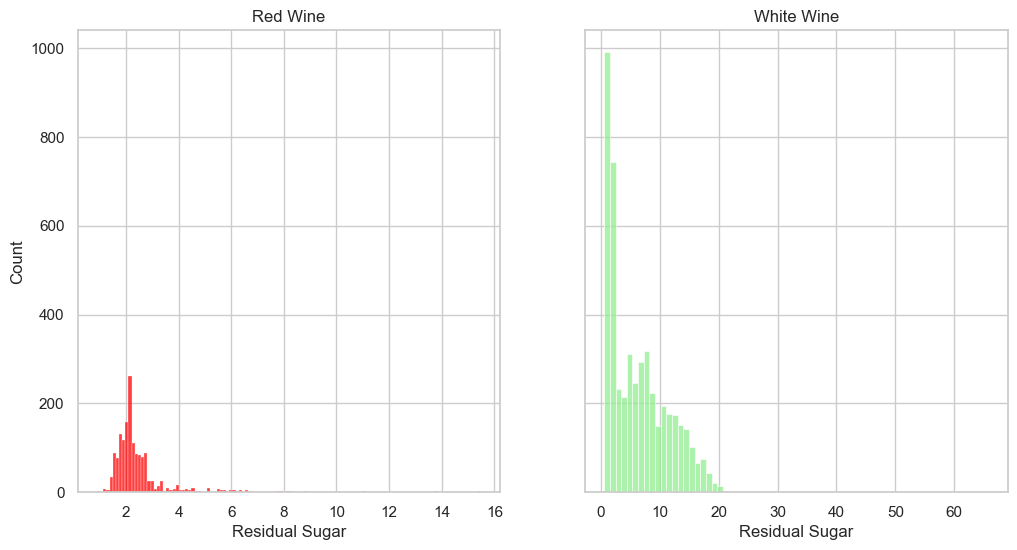

In [18]:
# plot the distributions of residual sugar across data pertaining to red and white wine samples

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side plot
# make sure this time the Y-Axis have the same limit (sharey=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(data=red_wine, x='residual sugar', color='red', ax=axes[0])
sns.histplot(data=white_wine, x='residual sugar', color='lightgreen', ax=axes[1])

# set labels for the x-axis
axes[0].set(xlabel='Residual Sugar')
axes[1].set(xlabel='Residual Sugar')

# set titles for plots
axes[0].set_title('Red Wine')
axes[1].set_title('White Wine')

# show the plot
plt.show()

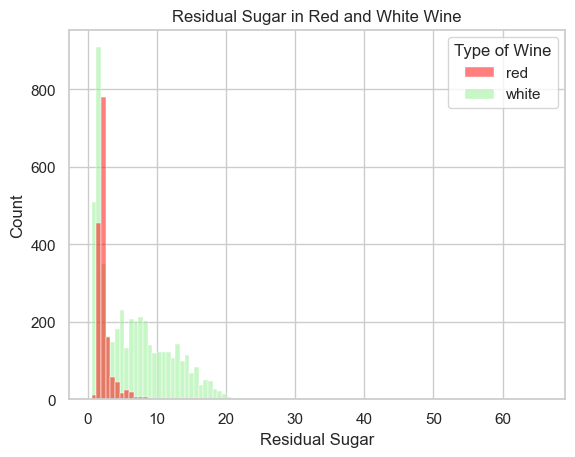

In [27]:
# plot the distributions of residual sugar across data pertaining to red and white wine samples
# but in one graph with the data overlaping and having the same x and y axes.

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure
fig, ax = plt.subplots()

# create a custom color palette with red and light green
custom_palette = sns.color_palette(["red", "lightgreen"])

ax = sns.histplot(data=wine, x='residual sugar', hue='color', palette=custom_palette)

# set label for the x-axis
ax.set(xlabel='Residual Sugar')

# set title for plot
ax.set_title('Residual Sugar in Red and White Wine')

# get the legend and change the title
legend = ax.get_legend()
legend.set_title("Type of Wine")

# show the plot
plt.show()